# Skew T Diagrams

## Overview

Summary text here

1. 

## Prerequisites

| Concepts | Importance | Notes |
| --- | --- | --- |
| []() | Necessary | |

- **Time to learn**: X minutes


---

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from metpy.plots import SkewT
import metpy.calc as mpcalc


If you want to get your own sounding data, run the following code in a new cell using the date and station of your choice:

```python
from datetime import datetime
from siphon.simplewebservice.wyoming import WyomingUpperAir

date = datetime(2023, 11, 20, 12)
station = 'GJT'
df = WyomingUpperAir.request_data(date, station)|
```

We've already done this for you and saved the data in a file, `notebooks/data/gjt_sounding.csv` for you to use. We'll use that file's data for the rest of the notebook

In [12]:
df = pd.read_csv('data/gjt_sounding.csv')
df

,pressure,height,temperature,dewpoint,direction,speed,u_wind,v_wind,station,station_number,time,latitude,longitude,elevation,pw
0,853.0,1475,5.2,2.0,305.0,3.0,2.457456,-1.720729,GJT,72476,2023-11-20 12:00:00,39.11,-108.53,1475.0,9.12
1,850.0,1508,7.2,1.2,280.0,13.0,12.802501,-2.257426,GJT,72476,2023-11-20 12:00:00,39.11,-108.53,1475.0,9.12
2,848.0,1527,7.4,1.4,287.0,13.0,12.431962,-3.800832,GJT,72476,2023-11-20 12:00:00,39.11,-108.53,1475.0,9.12
3,831.0,1693,6.4,-2.6,350.0,15.0,2.604723,-14.772116,GJT,72476,2023-11-20 12:00:00,39.11,-108.53,1475.0,9.12
4,820.0,1802,5.4,-2.8,10.0,13.0,-2.257426,-12.802501,GJT,72476,2023-11-20 12:00:00,39.11,-108.53,1475.0,9.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,13.4,28951,-55.7,-85.7,53.0,17.0,-13.576804,-10.230855,GJT,72476,2023-11-20 12:00:00,39.11,-108.53,1475.0,9.12
148,13.0,29144,-55.5,-85.5,75.0,20.0,-19.318517,-5.176381,GJT,72476,2023-11-20 12:00:00,39.11,-108.53,1475.0,9.12
149,12.7,29293,-55.3,-85.3,NaN,NaN,NaN,NaN,GJT,72476,2023-11-20 12:00:00,39.11,-108.53,1475.0,9.12
150,12.1,29601,-55.5,-85.5,NaN,NaN,NaN,NaN,GJT,72476,2023-11-20 12:00:00,39.11,-108.53,1475.0,9.12


In [13]:
p = df['pressure'].values
T = df['temperature'].values
Td = df['dewpoint'].values
u = df['u_wind'].values
v = df['v_wind'].values

In [14]:
df['pressure']

0      853.0
1      850.0
2      848.0
3      831.0
4      820.0
       ...  
147     13.4
148     13.0
149     12.7
150     12.1
151     12.0
Name: pressure, Length: 152, dtype: float64

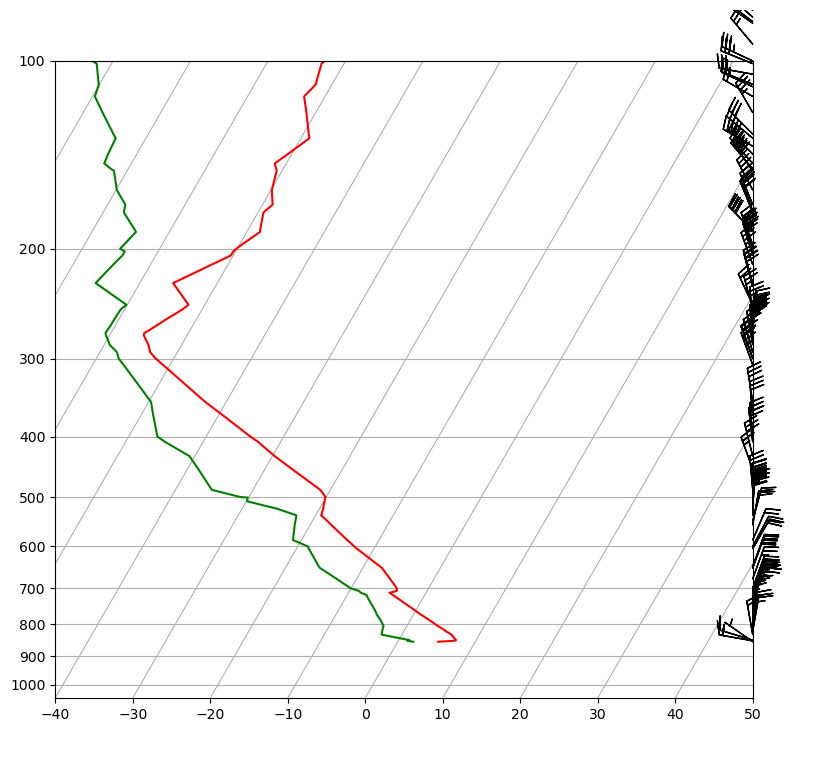

In [16]:
fig = plt.figure(figsize=(9, 9))
skew = SkewT(fig=fig)

# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dictated by the typical meteorological plot
skew.plot(p, T, 'r')
skew.plot(p, Td, 'g')
skew.plot_barbs(p, u, v)


## Summary

### What's next?


## Resources and references

- [Wyoming Upper Air](https://weather.uwyo.edu/upperair/)
- [Siphon](https://unidata.github.io/siphon/latest/examples/upperair/Wyoming_Request.html)
- [MetPy's SkewT documentation](https://unidata.github.io/MetPy/latest/api/generated/metpy.plots.SkewT.html)